In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('hotel_bookings.csv')

/tmp/ipython-input-2796505949.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('hotel_bookings.csv')


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58886.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,49758.000000,58889.000000,58889.000000,58889.000000,58889.000000
mean,0.411360,100.046714,2015.974597,27.837426,15.767159,1.058142,2.847631,1.860740,0.112947,0.010647,0.030192,0.069197,0.099626,0.242995,146.981310,3.526278,96.251314,0.096690,0.512184
std,0.492084,101.157752,0.687274,13.346370,8.783033,1.093056,2.235539,0.634778,0.419726,0.111210,0.171116,1.102185,0.829200,0.695194,120.113863,21.842580,58.557048,0.300326,0.768375
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,84.000000,0.000000,0.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58890 entries, 0 to 58889
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58890 non-null  object 
 1   is_canceled                     58890 non-null  int64  
 2   lead_time                       58890 non-null  int64  
 3   arrival_date_year               58890 non-null  int64  
 4   arrival_date_month              58890 non-null  object 
 5   arrival_date_week_number        58890 non-null  int64  
 6   arrival_date_day_of_month       58890 non-null  int64  
 7   stays_in_weekend_nights         58890 non-null  int64  
 8   stays_in_week_nights            58890 non-null  int64  
 9   adults                          58890 non-null  int64  
 10  children                        58886 non-null  float64
 11  babies                          58890 non-null  int64  
 12  meal                            

In [23]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0.0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0.0,Transient,103.00,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0.0,Transient,82.00,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0.0,Transient,105.50,0.0,0.0,Canceled,2015-04-22


<Axes: >

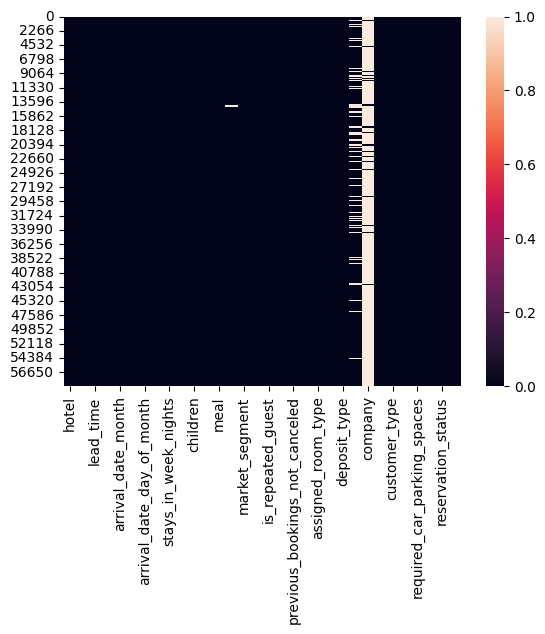

In [17]:
missing_counts = df.isna().sum()
sns.heatmap(df.isna())

In [18]:
missing_counts

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0



Column: adr
Q1: 60.0, Q3: 120.0, IQR: 60.0
Lower Bound: -30.0, Upper Bound: 210.0
Number of outliers in adr: 2721

Column: lead_time
Q1: 17.0, Q3: 157.0, IQR: 140.0
Lower Bound: -193.0, Upper Bound: 367.0
Number of outliers in lead_time: 1232

Column: agent
Q1: 9.0, Q3: 240.0, IQR: 231.0
Lower Bound: -337.5, Upper Bound: 586.5
Number of outliers in agent: 0


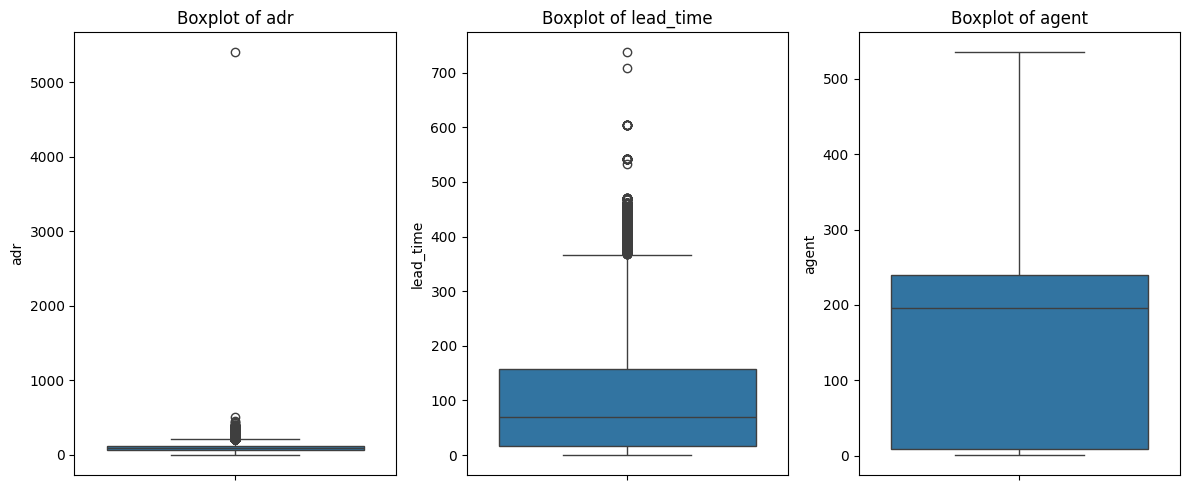

In [21]:
cols = ["adr", "lead_time" , "agent"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nColumn: {col}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of outliers in {col}: {len(outliers)}")

plt.figure(figsize=(12,5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Finding**
  -Ok first when we explore data to finding the missing values we reached that column "company" has 55411 missing values from 58890 rows so it's about 94% of data of this column is missing.
  -there's also another columns have a missing values like "Country" column but it has 58412 values and the missing percantage is less than 1% so it wouldn't be an issue for the model to use.
  -Also in Boxplots of "adr" and "lead_time" shows that there's a huge outliers in both this columns while the one of "agent" doesn't have any outliers.

In [25]:
columns = ["company" , "agent"]

for col in columns:
  df[col] = df[col].fillna(0)

In [26]:
most_frequantly_country = df["country"].mode()[0]

df["country"] = df["country"].fillna(most_frequantly_country)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58890 entries, 0 to 58889
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58890 non-null  object 
 1   is_canceled                     58890 non-null  int64  
 2   lead_time                       58890 non-null  int64  
 3   arrival_date_year               58890 non-null  int64  
 4   arrival_date_month              58890 non-null  object 
 5   arrival_date_week_number        58890 non-null  int64  
 6   arrival_date_day_of_month       58890 non-null  int64  
 7   stays_in_weekend_nights         58890 non-null  int64  
 8   stays_in_week_nights            58890 non-null  int64  
 9   adults                          58890 non-null  int64  
 10  children                        58886 non-null  float64
 11  babies                          58890 non-null  int64  
 12  meal                            

In [27]:
most_frequantly_children = df["children"].mode()[0]

df["children"] = df["children"].fillna(most_frequantly_children)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58890 entries, 0 to 58889
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58890 non-null  object 
 1   is_canceled                     58890 non-null  int64  
 2   lead_time                       58890 non-null  int64  
 3   arrival_date_year               58890 non-null  int64  
 4   arrival_date_month              58890 non-null  object 
 5   arrival_date_week_number        58890 non-null  int64  
 6   arrival_date_day_of_month       58890 non-null  int64  
 7   stays_in_weekend_nights         58890 non-null  int64  
 8   stays_in_week_nights            58890 non-null  int64  
 9   adults                          58890 non-null  int64  
 10  children                        58890 non-null  float64
 11  babies                          58890 non-null  int64  
 12  meal                            

In [33]:
df = df.drop_duplicates()

print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 44184


In [34]:
df["adr"] = np.where(df["adr"] > 1000, 1000, df["adr"])

In [36]:
date_cols = ["arrival_date_month", "arrival_date_year" , "arrival_date_week_number" , "arrival_date_day_of_month"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                 datetime64[ns]
arrival_date_month                datetime64[ns]
arrival_date_week_number          datetime64[ns]
arrival_date_day_of_month         datetime64[ns]
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [39]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_guests"] = df["total_guests"].astype(int)
print(df["total_guests"])

0        2
1        2
2        1
3        1
4        2
        ..
58878    2
58879    2
58881    2
58882    1
58889    2
Name: total_guests, Length: 44184, dtype: int64


In [40]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
print(df["total_nights"])

0        0
1        0
2        1
3        1
4        2
        ..
58878    2
58879    3
58881    3
58882    3
58889    3
Name: total_nights, Length: 44184, dtype: int64


In [44]:
df["is_family"] = np.where((df["children"] > 0) | (df["babies"] > 0), True , False )
print(f"Number of families: {df['is_family'].sum()}")

Number of families: 4870


In [45]:
categorical_cols = ["meal", "market_segment"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

          hotel  is_canceled  lead_time             arrival_date_year  \
0  Resort Hotel            0        342 1970-01-01 00:00:00.000002015   
1  Resort Hotel            0        737 1970-01-01 00:00:00.000002015   
2  Resort Hotel            0          7 1970-01-01 00:00:00.000002015   
3  Resort Hotel            0         13 1970-01-01 00:00:00.000002015   
4  Resort Hotel            0         14 1970-01-01 00:00:00.000002015   

  arrival_date_month      arrival_date_week_number  \
0                NaT 1970-01-01 00:00:00.000000027   
1                NaT 1970-01-01 00:00:00.000000027   
2                NaT 1970-01-01 00:00:00.000000027   
3                NaT 1970-01-01 00:00:00.000000027   
4                NaT 1970-01-01 00:00:00.000000027   

      arrival_date_day_of_month  stays_in_weekend_nights  \
0 1970-01-01 00:00:00.000000001                        0   
1 1970-01-01 00:00:00.000000001                        0   
2 1970-01-01 00:00:00.000000001                        0

In [46]:
country_freq = df["country"].value_counts()
df["country_freq"] = df["country"].map(country_freq)

print(df[["country", "country_freq"]].head())

  country  country_freq
0     PRT         17893
1     PRT         17893
2     GBR          6588
3     GBR          6588
4     GBR          6588


In [48]:
df = df.drop(["reservation_status", "reservation_status_date"], axis=1)

X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (35347, 33)
Testing set shape: (8837, 33)
